In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


In [97]:
std = pd.read_csv('logs/Stud_Math.csv')

### Пользовательские функции:

1) Функция для первичного анализа показателей

In [103]:
def primary_da(clm, bnd=None):
    print('Показатель', clm)
    
    if std.loc[:, clm].dtypes == np.dtype('O'):
        #категориальный показатель
        display(pd.DataFrame(std.loc[:, clm].value_counts()))
        print("Значений, встретившихся в столбце более 10 раз:", 
              (std.loc[:, clm].value_counts()>10).sum())
        #sns.countplot(std.loc[:,clm], ax=ax)
        #plt.show()
    else:
        #количественный показатель
        std.loc[:, clm].describe()
        fig, ax = plt.subplots()
        std.loc[:, clm].hist(ax=ax)
        ax.set_xlabel(clm)
        ax.set_ylabel('count')
        plt.show()
        if bnd is not None: 
            #выбросы
            if std.loc[(~std.loc[:, clm].between(bnd[0], bnd[1]))&
                       pd.notnull(std.loc[:, clm])].shape[0] > 0:
                print('Найдены выбросы:')
                display(std.loc[(~std.loc[:, clm].between(bnd[0], bnd[1]))&
                       pd.notnull(std.loc[:, clm])])
    print('Процент пропусков: ', str(round(100 - std.loc[:, clm].count()/std.shape[0]*100, 2)) + '%')
    print()
    

    


2) Функция для анализа номинативных переменных

In [100]:
def an_nom_var(clm):
    if std.loc[:, clm].dtypes == np.dtype('O'):
        print('Показатель ', clm)
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=clm, y='score', 
                    data=std.loc[std.loc[:, clm].isin(std.loc[:, clm].value_counts().index[:10])],
                   ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + clm)
        plt.show()
        
        cols = std.loc[:, clm].dropna().unique()
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            if ttest_ind(std.loc[std.loc[:, clm] == comb[0], 'score'].dropna(), 
                            std.loc[std.loc[:, clm] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all): # Учли поправку Бонферони
                print('Найдены статистически значимые различия')
                print('_________________________') 
                print('  ')
                break


    

### 1. Первичный отсмотр данных

In [101]:
display(std.head(10))
std.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В таблице содержатся данные о 365 учениках. 13 количественных и 17 качественных показателей. Пропущенные данные присутсвуют почти во всех столбцах.

### 2. Первичный анализ показателей

In [104]:
primary_da('school')    


Показатель school


,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  0.0%



In [105]:
primary_da('sex')    


Показатель sex


,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  0.0%



Показатель age


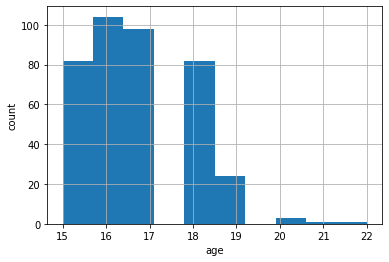

Процент пропусков:  0.0%



In [106]:
primary_da('age', bnd=(15,22))    


In [107]:
primary_da('address')   

Показатель address


,address
U,295
R,83


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  4.3%



In [108]:
primary_da('famsize')   

Показатель famsize


,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  6.84%



In [109]:
primary_da('Pstatus')   

Показатель Pstatus


,Pstatus
T,314
A,36


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  11.39%



Показатель Medu


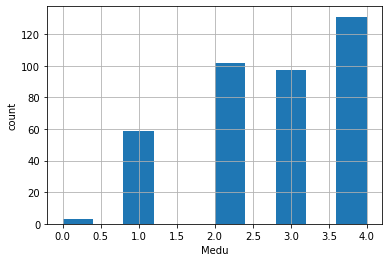

Процент пропусков:  0.76%



In [110]:
primary_da('Medu', bnd=(0,4))   

Показатель Fedu


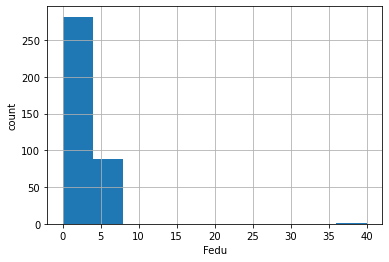

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Процент пропусков:  6.08%



In [111]:
primary_da('Fedu', bnd = (0, 4))    

In [112]:
primary_da('Fjob')

Показатель Fjob


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
Процент пропусков:  9.11%



In [113]:
primary_da('Mjob')

Показатель Mjob


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Процент пропусков:  4.81%



In [114]:
primary_da('reason')

Показатель reason


,reason
course,137
home,104
reputation,103
other,34


Значений, встретившихся в столбце более 10 раз: 4
Процент пропусков:  4.3%



In [115]:
primary_da('guardian')

Показатель guardian


,guardian
mother,250
father,86
other,28


Значений, встретившихся в столбце более 10 раз: 3
Процент пропусков:  7.85%



Показатель traveltime


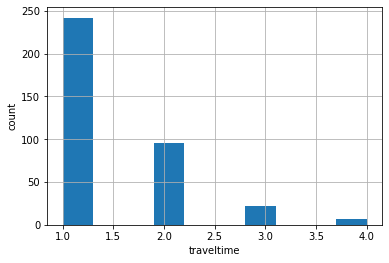

Процент пропусков:  7.09%



In [116]:
primary_da('traveltime', bnd=(1,4))

Показатель studytime


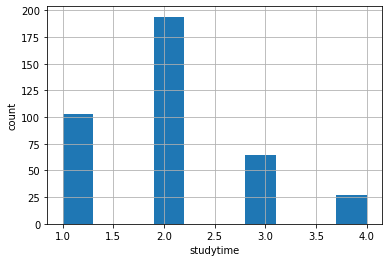

Процент пропусков:  1.77%



In [117]:
primary_da('studytime', bnd=(1,4))

Показатель failures


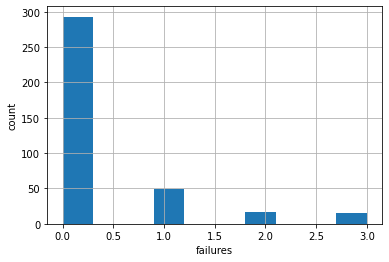

Процент пропусков:  5.57%



In [118]:
primary_da('failures', bnd=(0,4))

In [119]:
primary_da('schoolsup')

Показатель schoolsup


,schoolsup
no,335
yes,51


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  2.28%



In [120]:
primary_da('famsup')

Показатель famsup


,famsup
yes,219
no,137


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  9.87%



In [121]:
primary_da('paid')

Показатель paid


,paid
no,200
yes,155


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  10.13%



In [122]:
primary_da('activities')

Показатель activities


,activities
yes,195
no,186


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  3.54%



In [123]:
primary_da('nursery')

Показатель nursery


,nursery
yes,300
no,79


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  4.05%



Показатель studytime, granular


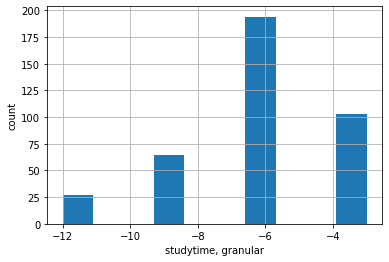

Процент пропусков:  1.77%



In [124]:
primary_da('studytime, granular')

In [125]:
primary_da('higher')

Показатель higher


,higher
yes,356
no,19


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  5.06%



In [126]:
primary_da('internet')

Показатель internet


,internet
yes,305
no,56


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  8.61%



In [127]:
primary_da('romantic')

Показатель romantic


,romantic
no,240
yes,124


Значений, встретившихся в столбце более 10 раз: 2
Процент пропусков:  7.85%



Показатель famrel


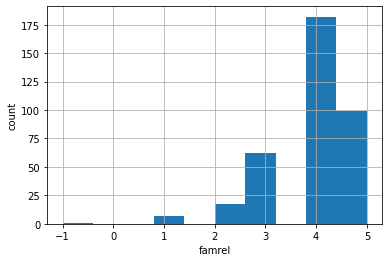

Найдены выбросы:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Процент пропусков:  6.84%



In [128]:
primary_da('famrel', bnd=(1,5))

Показатель freetime


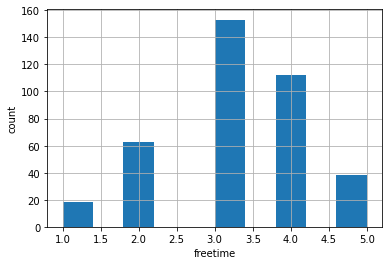

Процент пропусков:  2.78%



In [129]:
primary_da('freetime', bnd=(1,5))

Показатель goout


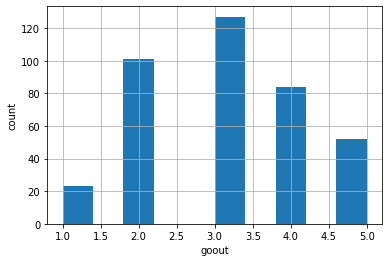

Процент пропусков:  2.03%



In [130]:
primary_da('goout', bnd=(1,5))

Показатель health


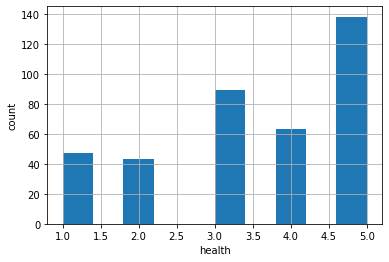

Процент пропусков:  3.8%



In [131]:
primary_da('health', bnd=(1,5))

Показатель absences


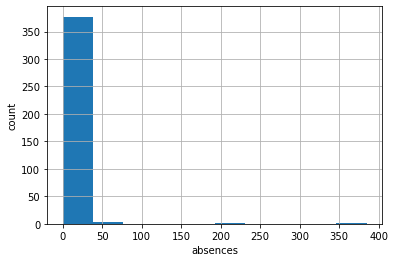

Процент пропусков:  3.04%



In [132]:
primary_da('absences')

Показатель score


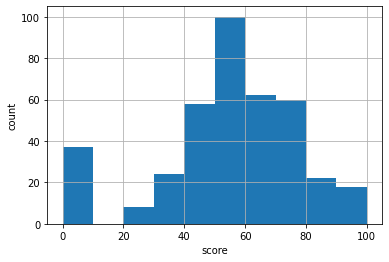

Процент пропусков:  1.52%



In [133]:
primary_da('score', bnd=(0,100))

<AxesSubplot:>

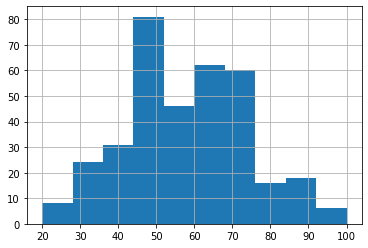

In [134]:
std[std.score >= 20].score.hist()


Процент пропусков во всех показателях не превышает 12%.

Выбросы, обнаруженные в показателях Fedu и famrel, скорее всего, связаны с опечатками при вводе данных. Исправим их:

In [135]:
std.loc[std['Fedu'] == 40, 'Fedu'] = 4
std.loc[std['famrel'] == -1, 'famrel'] = 1

Для анализа показателя 'absences' воспользуемся методом IQR

In [136]:
perc25 = std.absences.quantile(0.25)
perc75 = std.absences.quantile(0.75)
IQR = perc75 - perc25

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
#std.absences.loc[std.absences.between(
#perc25 - 1.5*IQR,
#perc75 + 1.5*IQR)].hist()

 


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [ ]:
Удалим выбросы и повторим первичный анализ для показателя absences:

In [137]:
std = std.loc[std.absences.between(
perc25 - 1.5*IQR,
20)|pd.isnull(std.absences)]

Показатель absences


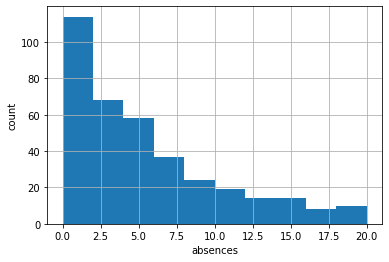

Процент пропусков:  3.17%



In [138]:
primary_da('absences')

### 3. Корреляционный анализ

In [139]:
std.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.178986,-0.182478,0.084835,-0.010813,0.213530,0.010813,0.061771,0.053455,0.150728,-0.063965,0.151493,-0.163081
Medu,-0.178986,1.000000,0.624821,-0.185128,0.097572,-0.256701,-0.097572,-0.013852,0.044221,0.054722,-0.041342,0.065712,0.220590
Fedu,-0.182478,0.624821,1.000000,-0.146594,0.021560,-0.290998,-0.021560,-0.020775,-0.015681,0.039009,0.026530,-0.021811,0.128802
traveltime,0.084835,-0.185128,-0.146594,1.000000,-0.089509,0.072128,0.089509,-0.018966,-0.012145,0.029913,-0.020663,-0.047995,-0.068430
studytime,-0.010813,0.097572,0.021560,-0.089509,1.000000,-0.185313,-1.000000,0.037133,-0.133125,-0.039458,-0.086300,-0.078099,0.120591
failures,0.213530,-0.256701,-0.290998,0.072128,-0.185313,1.000000,0.185313,-0.012432,0.087218,0.106159,0.092476,0.081801,-0.348271
"studytime, granular",0.010813,-0.097572,-0.021560,0.089509,-1.000000,0.185313,1.000000,-0.037133,0.133125,0.039458,0.086300,0.078099,-0.120591
famrel,0.061771,-0.013852,-0.020775,-0.018966,0.037133,-0.012432,-0.037133,1.000000,0.170666,0.073656,0.078428,-0.090500,0.067254
freetime,0.053455,0.044221,-0.015681,-0.012145,-0.133125,0.087218,0.133125,0.170666,1.000000,0.281941,0.052142,0.093436,0.041174
goout,0.150728,0.054722,0.039009,0.029913,-0.039458,0.106159,0.039458,0.073656,0.281941,1.000000,-0.005681,0.111587,-0.111971


Удалим из датасета показатель "studytime, granular", дублирующий "studytime", а также показатели, слабо коррелирующие с итоговыми баллами по ЕГЭ (score):

In [140]:
std.drop(['studytime, granular', 'traveltime', 'famrel', 'freetime', 'health', 'absences'], axis=1, inplace=True)

In [ ]:
Итоговая успеваемость наиболее сильно коррелирует с количеством неудач и образованием матери.

### 4. Анализ номинативных переменных

Показатель  school


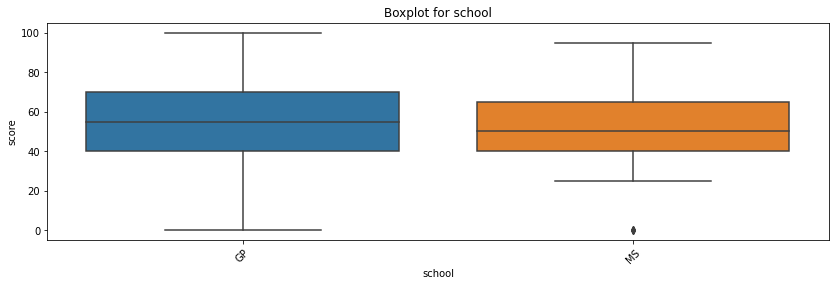

Показатель  sex


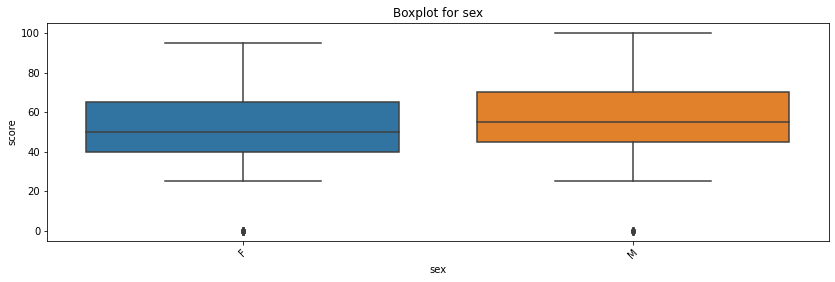

Найдены статистически значимые различия
_________________________
  
Показатель  address


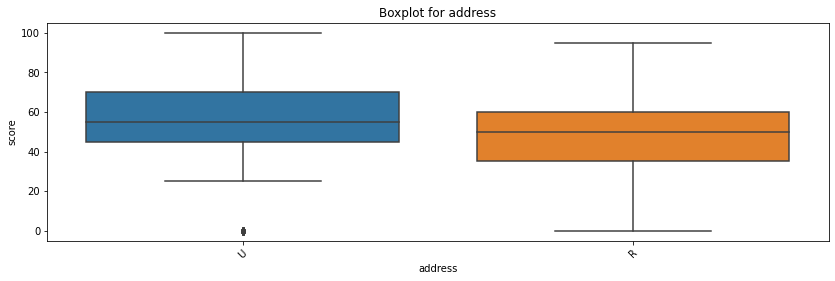

Найдены статистически значимые различия
_________________________
  
Показатель  famsize


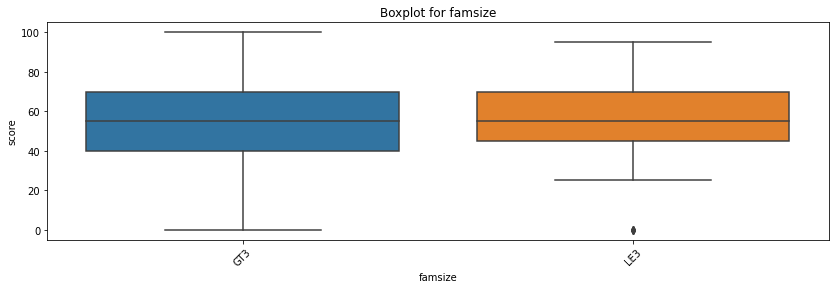

Показатель  Pstatus


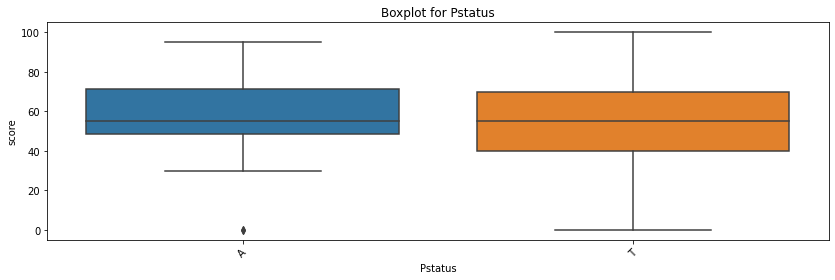

Показатель  Mjob


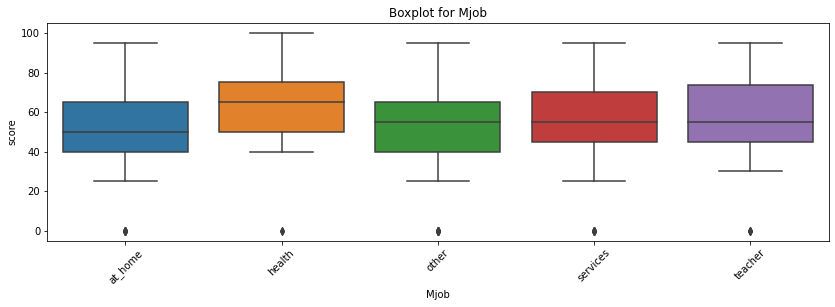

Найдены статистически значимые различия
_________________________
  
Показатель  Fjob


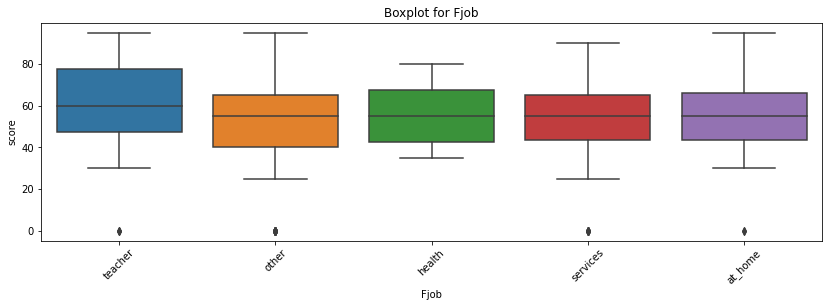

Показатель  reason


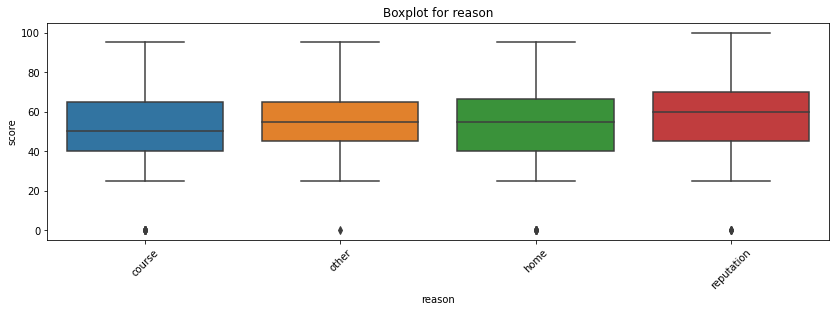

Показатель  guardian


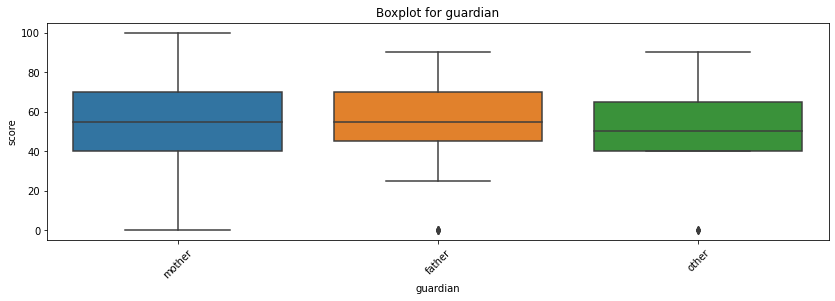

Показатель  schoolsup


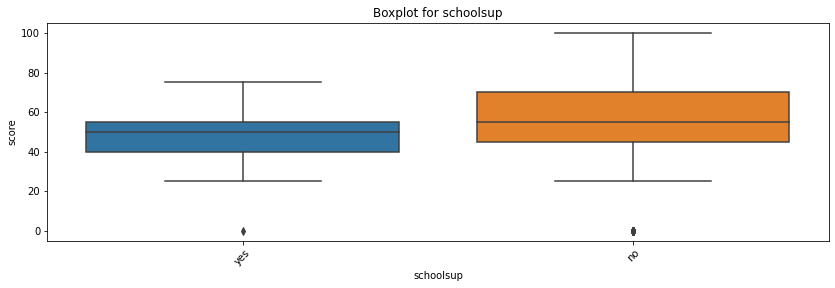

Показатель  famsup


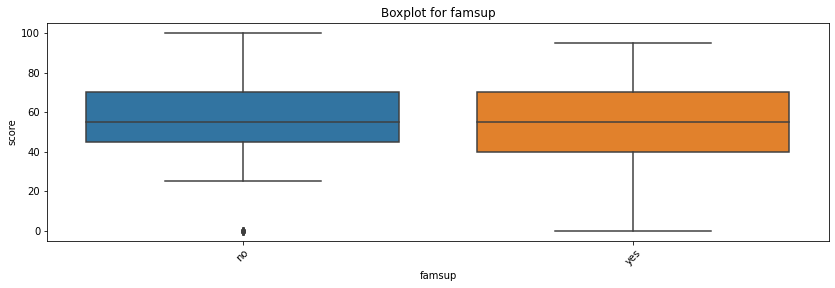

Показатель  paid


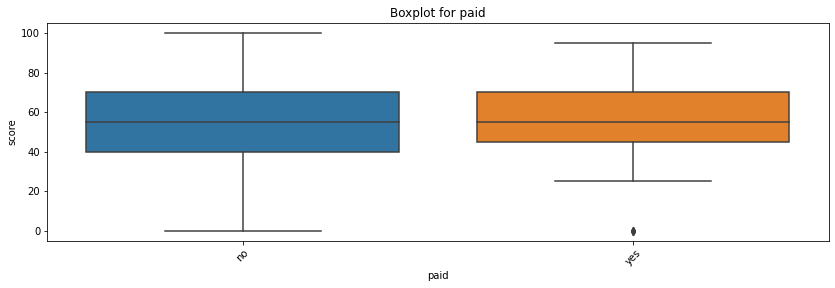

Найдены статистически значимые различия
_________________________
  
Показатель  activities


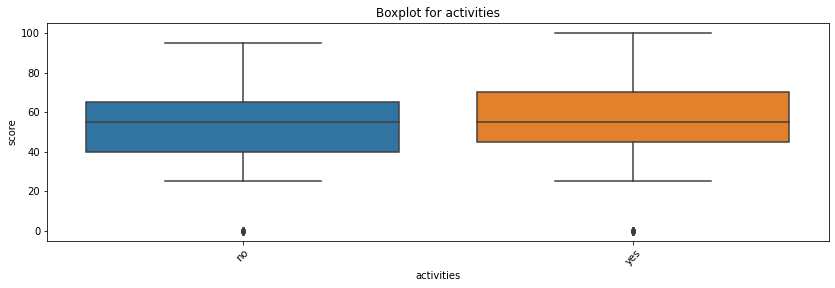

Показатель  nursery


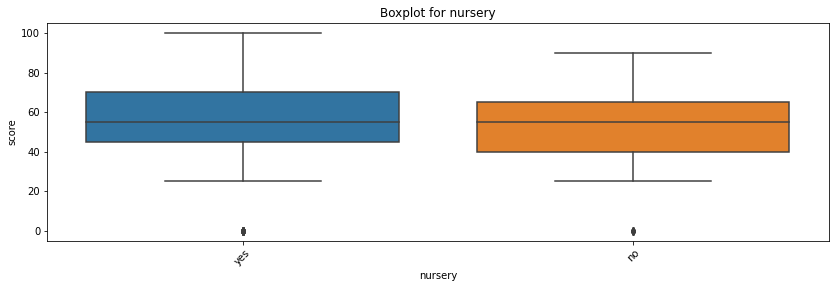

Показатель  higher


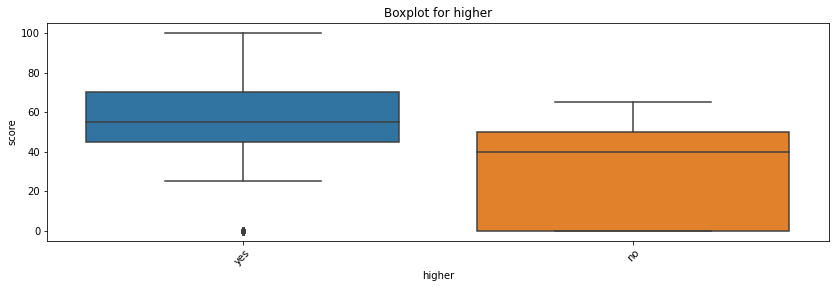

Найдены статистически значимые различия
_________________________
  
Показатель  internet


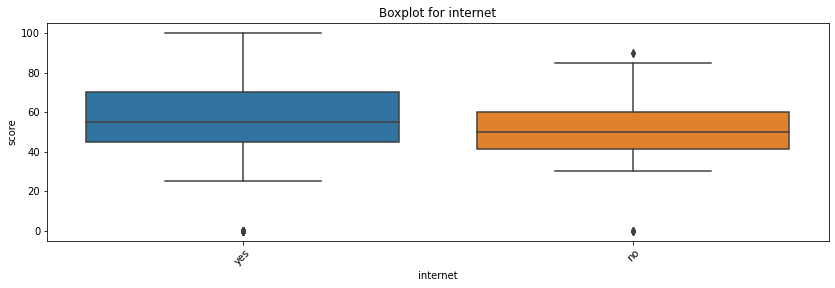

Показатель  romantic


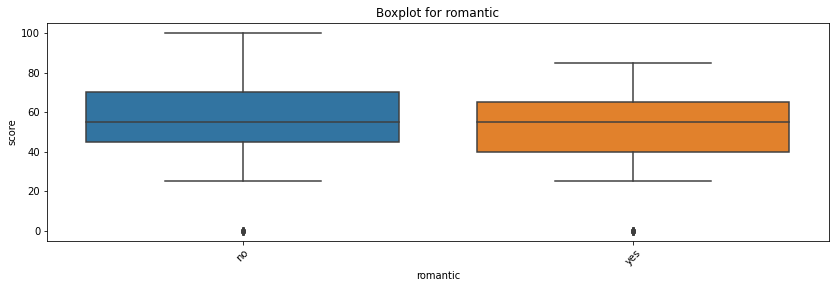

Найдены статистически значимые различия
_________________________
  


In [141]:
for clm in std.columns:
    an_nom_var(clm)

Статистически значимые различия найдены в столбцах sex, address, Mjob, paid, higher, romantic. Остальные столбцы можно исключить. Для постороения модели оставлены следующие показатели:

In [143]:
std.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'famsup', 'activities'], axis = 1, inplace = True)

In [144]:
std.head()

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,nursery,higher,internet,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,yes,NaN,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,no,yes,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,yes,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,yes,no,no,2.0,50.0


### Выводы

1. В таблице содержатся данные о 365 учениках. 13 количественных и 17 качественных показателей. Пропущенные данные присутсвуют почти во всех столбцах.
2. Процент пропусков во всех показателях не превышает 12%. Выбросы, обнаруженные в показателях Fedu и famrel, скорее всего, связаны с опечатками при вводе данных. Выбросы в показателе absences - это наличие 3% злостных прогульщиков среди учеников.
3. Итоговая успеваемость наиболее сильно коррелирует с количеством неудач и образованием матери.
4. Обнаружено отсутвие коррреляции успеваемости и таких показателей, как здоровье, свободное время, поддержка семьи и время до школы.
5. Важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, age, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, paid, higher, romantic, goout, score.
